In [1]:
# Importing the Required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Import the natural language toolkit library
import nltk
import re
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score



[nltk_data] Downloading package punkt to /Users/kanha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/kanha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Importing the Data
data = pd.read_csv('train.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
data.shape

(20800, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
#Check the no of artices in true and fake
#0 for REAL & 1 for FAKE
data.label.value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

<Axes: xlabel='label'>

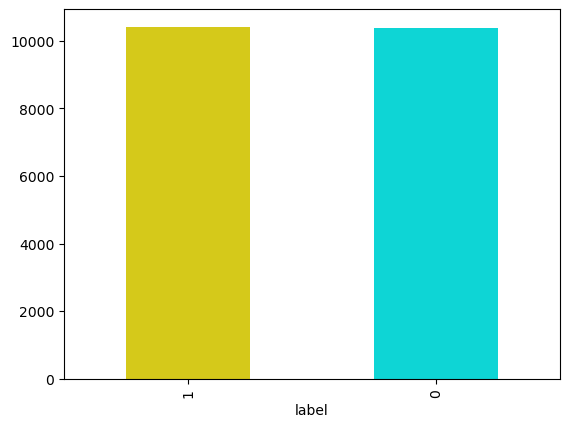

In [6]:
#Check the data distribution
data.label.value_counts().plot(kind='bar',color=['#d5c91a','#0ed5d5'])

In [7]:
# Check if there is any null values
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
#Fill The Missing Values
data = data.fillna('')

In [9]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

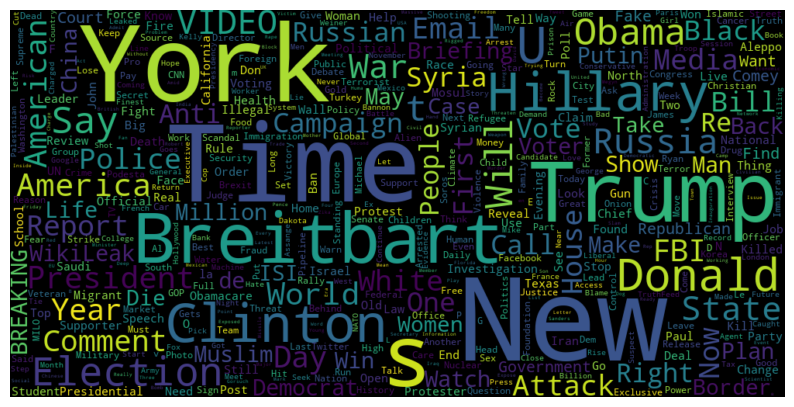

In [10]:
#WordCloud For the Title Of The News

title = data.title
titles = [text for text in title]
words = ' '.join(title)
wc = WordCloud(max_words = 500,background_color='black',width= 1000, height= 500,max_font_size = 150,collocations = False).generate(words)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilInear')
plt.axis("off")
#plt.savefig("wordcloud.png", bbox_inches='tight')

In [11]:
# Concatenate the title with the text
data['title'] = data['title']+' '+data['text']
#data['title'] = data['title']

In [12]:
data.head(2)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


In [13]:
# Drop the unnecessary columns
data.drop(['id','text','author'],axis=1,inplace=True)

In [14]:
data.head(2)

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0


/opt/anaconda3/envs/fake/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


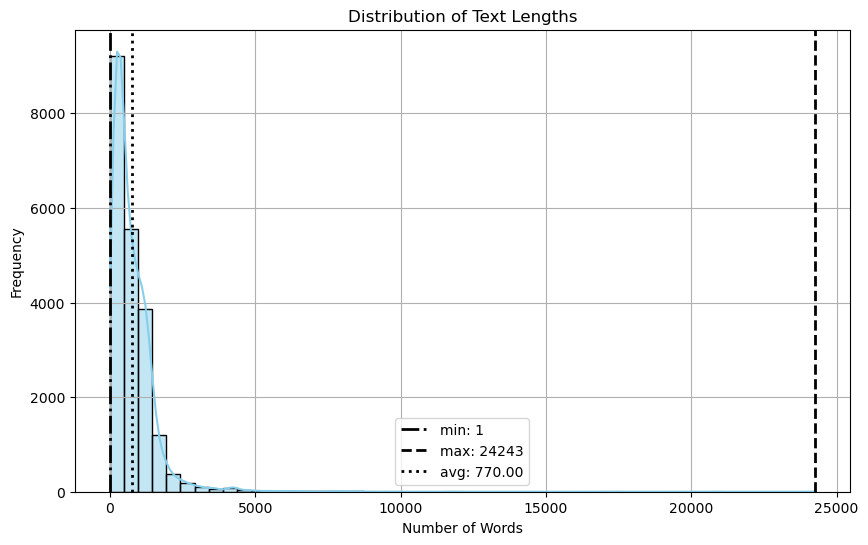

In [15]:
# Plotting the number of words in texts
def visualize_text_lengths(dataset: pd.DataFrame):
    text_lengths = dataset['title'].apply(lambda x: len(x.split()))

    # Calculate statistics
    avg_length = int(sum(text_lengths) / len(text_lengths))
    max_length = max(text_lengths)
    min_length = min(text_lengths)
    
    plt.figure(figsize=(10, 6))
    sns.histplot(text_lengths, kde=True, color='skyblue', bins=50)
    plt.axvline(min_length, color='black', linestyle='dashdot', linewidth=2, label=f'min: {min_length}')
    plt.axvline(max_length, color='black', linestyle='dashed', linewidth=2, label=f'max: {max_length}')
    plt.axvline(avg_length, color='black', linestyle='dotted', linewidth=2, label=f'avg: {avg_length:.2f}')
    plt.title('Distribution of Text Lengths')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.legend()

    plt.grid(True)
    plt.show()

visualize_text_lengths(data)


TEXT PROCESSING

In [16]:
ps=PorterStemmer()
corpus=[]
for i in range(0,len(data)):
  review= re.sub('[^a-zA-Z]',' ',data['title'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [17]:
X=corpus
y=data['label']

In [18]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [19]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=vectorizer.fit_transform(corpus)

In [20]:
#Saving the Vectroizer Model
with open('vectorizer_model.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [24]:
# Calculate the accuracy
score = accuracy_score(y_test, pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 95.7%


Pasive Aggressive Classifer

In [25]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [26]:
pac = PassiveAggressiveClassifier(C=1.0,fit_intercept=True,max_iter=100,shuffle=True,random_state=None,n_iter_no_change=10,n_jobs=1)
pac.fit(X_train, y_train)
pred = pac.predict(X_test)

In [27]:
# Calculate the accuracy
score = accuracy_score(y_test, pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 95.99%


In [28]:
#Classification Report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2031
           1       0.96      0.96      0.96      2129

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



In [29]:
#Confusion Matrix
print(confusion_matrix(y_test,pred))

[[1941   90]
 [  77 2052]]


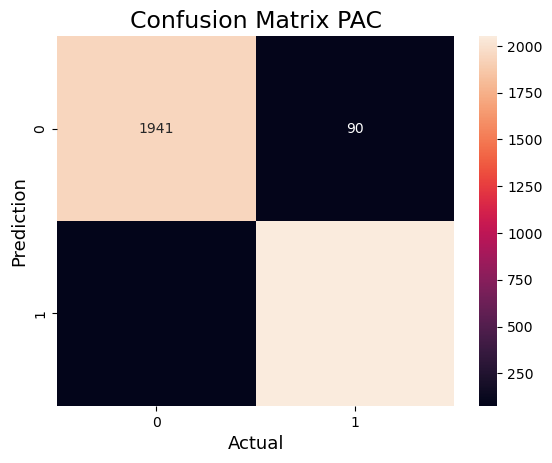

In [30]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g',)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix PAC',fontsize=17)
plt.show()

In [31]:
with open('pac.pkl','wb') as file:
    pickle.dump(pac,file)

ANN Bi-LSTM

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer

In [33]:
# Determine the average word count across texts to set the sequence length.
# Compute the total count of distinct words for the TensorFlow tokenizer's input.
text_len = data['title'].apply(lambda x: len(x.split()))
avg_len = round(text_len.mean())
lst = []
for i in data['title']:
    tmp = i.split()
    lst.extend(tmp)
lst = set(lst)
vocab_size = len(lst)
print("the average number of words in the texts is : ", avg_len)
print("the texts contains", vocab_size, "unique words")

the average number of words in the texts is :  771
the texts contains 503223 unique words


In [34]:
# Create and fit the tokenizer
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(data['title'])
sequences = tokenizer.texts_to_sequences(data['title'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 241594 unique tokens.


In [35]:
# Extend tokenizer sequences to a fixed length of 235 (average words + 2) using padding.
# Padding the sequences
data = pad_sequences(sequences, maxlen=avg_len+2, padding='post', truncating='post')

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.25, random_state=25)
#print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

In [37]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=avg_len+2))
#model.add(Embedding(vocab_size, embedding_dim=100, input_length=avg_len+2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

2024-05-04 19:36:59.963398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-04 19:36:59.964477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-04 19:36:59.965066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 773, 100)          50322300  
                                                                 
 bidirectional (Bidirectiona  (None, 773, 128)         84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 773, 128)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4

In [38]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(X_train, Y_train, epochs=10, validation_split=0.1, batch_size=32)

Epoch 1/10


2024-05-04 19:37:00.241689: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-04 19:37:00.377995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-04 19:37:00.378560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-04 19:37:00.379077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

439/439 [==============================] - ETA: 0s - loss: 0.1438 - accuracy: 0.9407

2024-05-04 19:42:49.880066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-04 19:42:49.881009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-04 19:42:49.881953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

439/439 [==============================] - 358s 806ms/step - loss: 0.1438 - accuracy: 0.9407 - val_loss: 0.1032 - val_accuracy: 0.9712
Epoch 2/10
439/439 [==============================] - 538s 1s/step - loss: 0.0144 - accuracy: 0.9966 - val_loss: 0.0919 - val_accuracy: 0.9763
Epoch 3/10
439/439 [==============================] - 639s 1s/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.1193 - val_accuracy: 0.9699
Epoch 4/10
439/439 [==============================] - 465s 1s/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.1826 - val_accuracy: 0.9673
Epoch 5/10
439/439 [==============================] - 392s 893ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.1396 - val_accuracy: 0.9679
Epoch 6/10
439/439 [==============================] - 353s 805ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.2050 - val_accuracy: 0.9654
Epoch 7/10
439/439 [==============================] - 341s 777ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.1871 - val_accuracy: 0.973

In [40]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", accuracy)

163/163 [==============================] - 23s 141ms/step - loss: 0.1589 - accuracy: 0.9646
Test Accuracy: 0.9646154046058655


In [41]:
model.save('ann_model.h5')

Model Evaluation

In [43]:
# loading the saved model.
model = load_model("ann_model.h5")

2024-05-04 20:47:28.235746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-04 20:47:28.236405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-04 20:47:28.236809: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [44]:
# evaluating the model with the evaluate method.
model.evaluate(X_test, Y_test)

2024-05-04 20:47:30.816924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-04 20:47:30.817490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-04 20:47:30.818067: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

163/163 [==============================] - 20s 121ms/step - loss: 0.1589 - accuracy: 0.9646


[0.15890571475028992, 0.9646154046058655]

In [45]:
# predict the labels of test set.
Y_pred = (model.predict(X_test) >= 0.5).astype("int")

2024-05-04 20:47:51.102615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-04 20:47:51.103143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-04 20:47:51.103628: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

163/163 [==============================] - 18s 108ms/step


In [46]:
# Evaluating the model using sklearn metrics.

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print("Model Accuracy : ", accuracy)
print('Precision on testing set:', precision)
print('Recall on testing set:', recall)

Model Accuracy :  0.9646153846153847
Precision on testing set: 0.9554189085318986
Recall on testing set: 0.9733750978856696


In [47]:
print(confusion_matrix(Y_test, Y_pred))

[[2530  116]
 [  68 2486]]


In [48]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2646
           1       0.96      0.97      0.96      2554

    accuracy                           0.96      5200
   macro avg       0.96      0.96      0.96      5200
weighted avg       0.96      0.96      0.96      5200



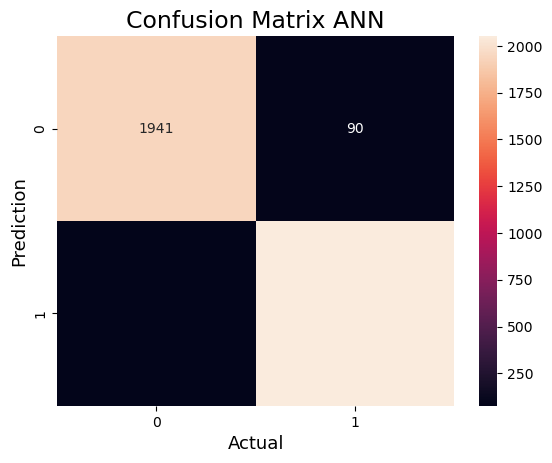

In [49]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g',)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix ANN',fontsize=17)
plt.show()

<Axes: >

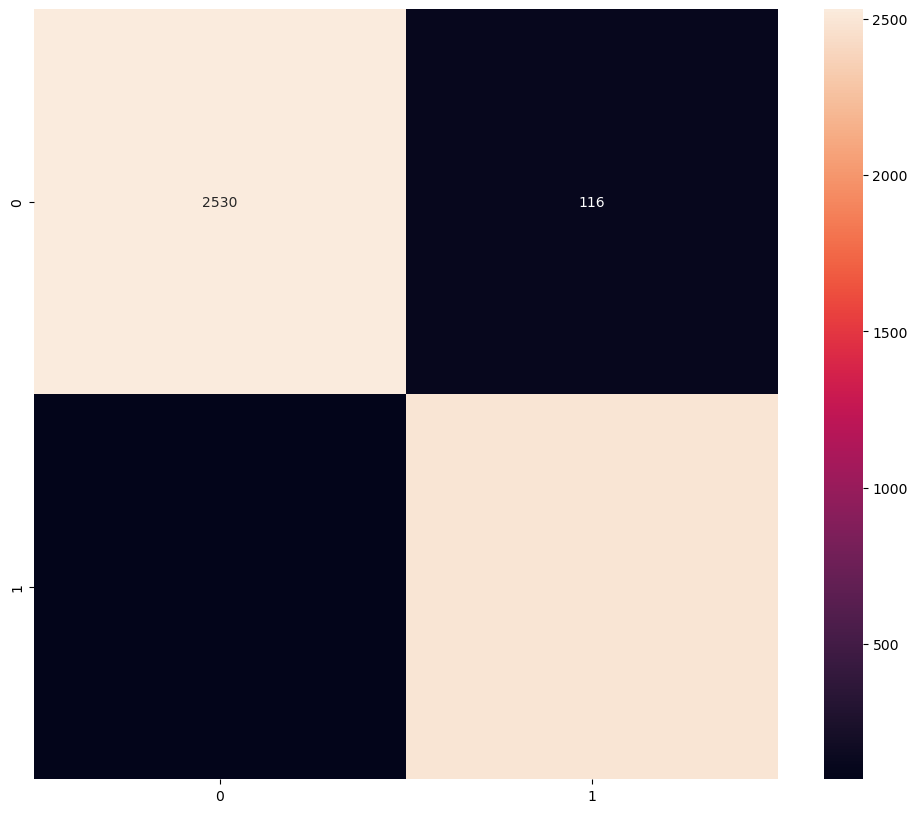

In [50]:
# Ploting the confusion matrix using the seaborn library

plt.figure(figsize=(12, 10))
#ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True,fmt='g')
#ax.xaxis.set_ticklabels(['Fake','True'], size=15)
#ax.yaxis.set_ticklabels(['Fake','True'], size=15)
#plt.savefig("../Confusion_matrix.png", bbox_inches='tight')